**activation function interface**

In [1]:
from abc import ABC
from abc import abstractmethod

class interface_activation_function(ABC):
  @abstractmethod
  def calculate(self, input_sum):
    pass

**activation function interface**

In [2]:
class interface_error_function(ABC):
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate

  @abstractmethod
  def calculate(self, old_weight, x, y, y_hat):
    pass

**threshold activation function**

In [3]:
class threshold_activation_function(interface_activation_function):
  def __init__(self, threshold, greater_or_equal = True, greater_return_value = 1):
    self.threshold = threshold
    self.greater_or_equla = greater_or_equal
    self.greater_return_value = greater_return_value


  def calculate(self, input_sum):
    if(self.greater_or_equla):
      if(input_sum >= self.threshold):
        if(self.greater_return_value == 1):
          return 1
        else:
          return 0
      else:
        if(self.greater_return_value == 1):
          return 0
        else:
          return 1
    else:
      if(input_sum <= self.threshold):
        if(self.greater_return_value == 1):
          return 0
        else:
          return 1
      else:
        if(self.greater_return_value == 1):
          return 1
        else:
          return 0



**linear activation function**

In [4]:
class linear_activation_function(interface_activation_function):

  def calculate(self, input_sum):
    return input_sum

**logistic activation function**

In [5]:
import math
class logistic_activation_function(interface_activation_function):

  def calculate(self, input_sum):
    return 1/(1+math.exp(-input_sum))

**threshold error function**

In [6]:
import numpy as np
class threshold_error_function(interface_error_function):

  def __init__(self, learning_rate):
    super(threshold_error_function, self).__init__(learning_rate)


  def calculate(self, old_weight, x, y, y_hat):
    E = y - y_hat
    new_weight = old_weight + self.learning_rate  * x * E
    return new_weight

**(square) delta rule error function**

In [7]:
class delta_rule_error_function(interface_error_function):

  def __init__(self, learning_rate):
    super(delta_rule_error_function, self).__init__(learning_rate)


  def calculate(self, old_weight, x, y, y_hat):
    E = y - y_hat
    new_weight = old_weight + self.learning_rate * x * E
    return new_weight

**delta rule error function for epoch learning**

In [8]:
from sqlalchemy.sql.elements import Null
class delta_rule_error_function_epoch_learning(interface_error_function):

  def __init__(self, learning_rate, batch_size):
    self.batch_size = batch_size
    self.counter = 0
    self.sum_error = 0
    super(delta_rule_error_function_epoch_learning, self).__init__(learning_rate)


  def calculate(self, old_weight, x, y, y_hat):
    new_weight = None
    print(f' i is {self.counter} and bs {self.batch_size}')
    if self.counter < self.batch_size -1:
      E = y - y_hat
      self.sum_error += E*x
      self.counter += 1
    else:
      new_weight = old_weight + self.learning_rate *(self.sum_error/self.batch_size)
      self.counter = 0
    return new_weight

**general ANN node**

In [9]:
from re import subn
import numpy as np

class node():
  def __init__(self, activation_function, error_function, input_dim, random_weight = True, bias = False, bias_value = 1, acceptable_error_range = 0.0):
    #self.batch_learning = batch_learning
    self.acceptable_error_range = acceptable_error_range
    self.bias = bias
    self.bias_value = bias_value
    if bias:
      self.input_dim = input_dim + self.bias_value
    else:
      self.input_dim = input_dim
    self.activation_function = activation_function
    if(random_weight):
      self.weight_list = np.random.randint(1,10, size=(1,self.input_dim))/10
    else:
      self.weight_list = list()
    self.random_weight = random_weight
    self.error_function = error_function


  def forward(self, data_list):
    if self.bias:
      self.data_list = np.append(data_list, self.bias_value)
    else:
      self.data_list = data_list
    summation = np.dot(self.data_list, self.weight_list.T)
    self.out = self.activation_function.calculate(summation)

    return self.out

  def back_prop(self, real_out):
    w = self.error_function.calculate(self.weight_list, self.data_list, real_out, self.out)
    #print(f'w is {w}')
    if(abs(self.acceptable_error_range) < abs(real_out - self.out )and type(w) == type(np.asarray(0))):
      self.weight_list = w
    return self.weight_list

**ex1**

In [10]:
input_data = np.array([[0.3, 0.7],
                         [-0.6, 0.3],
                         [-0.1, -0.8],
                         [0.1, -0.45]])

init_weight = np.array([0.8, -0.5])

act_func = threshold_activation_function(0, greater_or_equal = True, greater_return_value = 1)
err_func = threshold_error_function(learning_rate= 0.5)


percep = node(act_func, err_func, 2, random_weight= False)

percep.weight_list = init_weight

real_out = np.array([1, 0, 0, 1])

for i in range(0, real_out.size):
  percep.forward(input_data[i])
  print(f'out befor back prop: {percep.out}')
  print(f'weight befor back prop: {percep.weight_list}')
  percep.back_prop(real_out[i])
  print(f'weight after back prop: {percep.weight_list}')
  print('--------------------')

out befor back prop: 0
weight befor back prop: [ 0.8 -0.5]
weight after back prop: [ 0.95 -0.15]
--------------------
out befor back prop: 0
weight befor back prop: [ 0.95 -0.15]
weight after back prop: [ 0.95 -0.15]
--------------------
out befor back prop: 1
weight befor back prop: [ 0.95 -0.15]
weight after back prop: [1.   0.25]
--------------------
out befor back prop: 0
weight befor back prop: [1.   0.25]
weight after back prop: [1.05  0.025]
--------------------


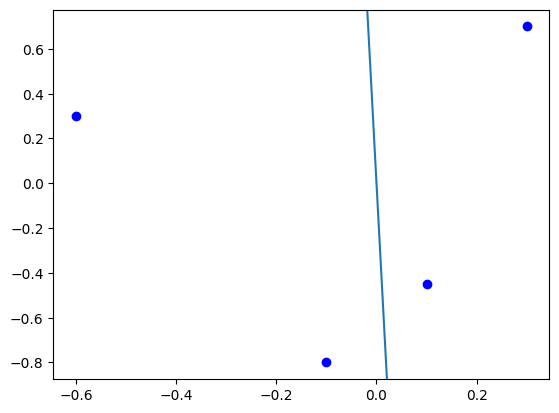

In [11]:
import matplotlib.pyplot as plt
for i in input_data:
 plt.plot(i[0], i[1], 'bo')

x1 , y1 = 0.01 , -percep.weight_list[0]/percep.weight_list[1] * 0.01
x2 , y2 = -0.01 , -percep.weight_list[0]/percep.weight_list[1] * -0.01
plt.axline((x1, y1), (x2, y2))
plt.show()


**ex3**

In [12]:
from google.colab import drive
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
drive.mount('/content/drive/')


data = pd.read_csv("/content/drive/My Drive/dataset/2d-2class-dataset.csv")
data = shuffle(data)
train_data, test_data = train_test_split(data,test_size=0.3,random_state=0)
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()




act_func = threshold_activation_function(0, greater_or_equal = True, greater_return_value = 0)
err_func = threshold_error_function(learning_rate= 0.1)

percep = node(act_func, err_func, 2, random_weight= True, bias = True)
epoch = 1
for i in range(epoch):
  for (x,y,z) in train_data:
    percep.forward(np.asarray([x,y]))
    print(x,y,z)
    print(f'out befor back prop: {percep.out} and real is {z}')
    print(f'weight befor back prop: {percep.weight_list}')
    percep.back_prop(z)
    print(f'weight after back prop: {percep.weight_list}')
    print('--------------------')

Mounted at /content/drive/
-305 254 0
out befor back prop: 1 and real is 0
weight befor back prop: [[0.6 0.1 0.1]]
weight after back prop: [[ 31.1 -25.3   0. ]]
--------------------
260 133 1
out befor back prop: 0 and real is 1
weight befor back prop: [[ 31.1 -25.3   0. ]]
weight after back prop: [[ 57.1 -12.    0.1]]
--------------------
-287 17 0
out befor back prop: 1 and real is 0
weight befor back prop: [[ 57.1 -12.    0.1]]
weight after back prop: [[ 85.8 -13.7   0. ]]
--------------------
-86 -178 0
out befor back prop: 1 and real is 0
weight befor back prop: [[ 85.8 -13.7   0. ]]
weight after back prop: [[94.4  4.1 -0.1]]
--------------------
-267 -83 0
out befor back prop: 1 and real is 0
weight befor back prop: [[94.4  4.1 -0.1]]
weight after back prop: [[121.1  12.4  -0.2]]
--------------------
119 161 1
out befor back prop: 0 and real is 1
weight befor back prop: [[121.1  12.4  -0.2]]
weight after back prop: [[ 1.33e+02  2.85e+01 -1.00e-01]]
--------------------
33 75 1
ou

[[790.5 163.7   1.7]]


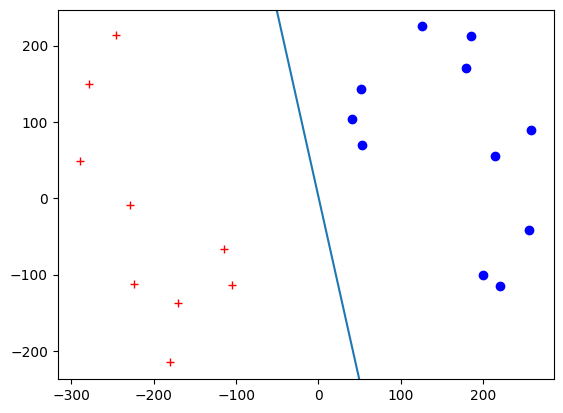

In [13]:
import matplotlib.pyplot as plt
for (x,y,z) in test_data:
  if z == 1:
    plt.plot(x, y, 'bo')
  else:
    plt.plot(x, y, 'r+')

print(percep.weight_list)
x1 , y1 = 1 , -percep.weight_list[0][0]/percep.weight_list[0][1] * 1 + percep.weight_list[0][2]
x2 , y2 = -1 , -percep.weight_list[0][0]/percep.weight_list[0][1] * -1 + percep.weight_list[0][2]
plt.axline((x1, y1), (x2, y2))
plt.show()


**ex4**


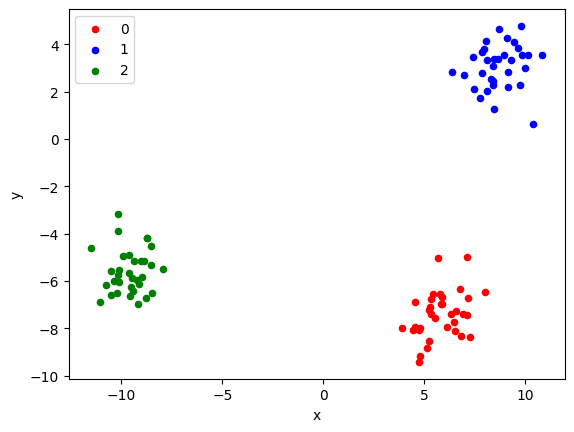

In [24]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
data = shuffle(data)
train_data, test_data = train_test_split(df,test_size=0.3,random_state=1)
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [40]:
class Perceptron_three_class:
  def __init__(self, in_dim, act_func, err_func, bias = True, rand_w = True):
    self.err_func = err_func
    self.act_func = act_func
    self.bias = bias
    self.in_dim = in_dim
    self.rand_w = rand_w
    self.nodes = [
        node(self.act_func, self.err_func, self.in_dim, random_weight= self.rand_w, bias = self.bias),
        node(self.act_func, self.err_func, self.in_dim, random_weight= self.rand_w, bias = self.bias),
        node(self.act_func, self.err_func, self.in_dim, random_weight= self.rand_w, bias = self.bias)
    ]

  def iterate(self, data_list, real_out):
    if self.bias:
      self.data_list = np.append(data_list, 1)
    else:
      self.data_list = data_list
    j = 0
    for i in self.nodes:
      i.forward(data_list)
      i.back_prop(real_out[j])
      j = j+1
      if j == 3:
        j=0;

In [45]:
act_func = threshold_activation_function(0, greater_or_equal = True, greater_return_value = 1)
err_func = threshold_error_function(learning_rate= 0.5)

perc = Perceptron_three_class(2, act_func, err_func)

epoch = 10
for i in range(epoch):
  for (x, y, z) in train_data:
    if z == 0:
      perc.iterate([x,y], [1,0,0])
    elif z == 1:
      perc.iterate([x,y], [0,1,0])
    elif z == 2:
      perc.iterate([x,y], [0,0,1])

[[ 0.77261374 -1.14550329 -8.8       ]]
[[2.17246176 5.54885962 0.5       ]]
[[-3.5663907  -1.15672576 -0.4       ]]


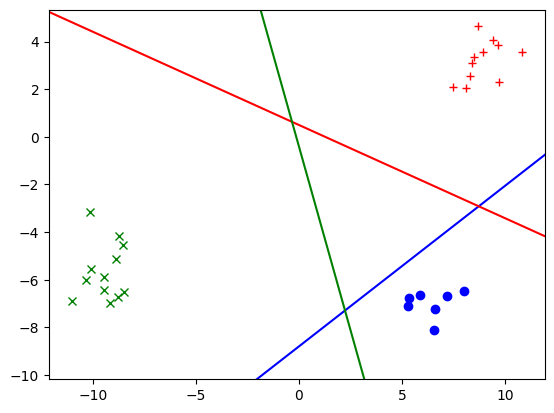

In [46]:
import matplotlib.pyplot as plt
for (x,y,z) in test_data:
  if z == 0:
    plt.plot(x, y, 'bo')
  elif z == 1:
    plt.plot(x, y, 'r+')
  elif z == 2:
    plt.plot(x, y, 'gx')

print(perc.nodes[0].weight_list)
print(perc.nodes[1].weight_list)
print(perc.nodes[2].weight_list)



x1 , y1 = 1 , -perc.nodes[0].weight_list[0][0]/perc.nodes[0].weight_list[0][1] * 1 + perc.nodes[0].weight_list[0][2]
x2 , y2 = -1 , -perc.nodes[0].weight_list[0][0]/perc.nodes[0].weight_list[0][1] * -1 + perc.nodes[0].weight_list[0][2]
plt.axline((x1, y1), (x2, y2), color='b')
x1 , y1 = 1 , -perc.nodes[1].weight_list[0][0]/perc.nodes[1].weight_list[0][1] * 1 + perc.nodes[1].weight_list[0][2]
x2 , y2 = -1 , -perc.nodes[1].weight_list[0][0]/perc.nodes[1].weight_list[0][1] * -1 + perc.nodes[1].weight_list[0][2]
plt.axline((x1, y1), (x2, y2), color='r')
x1 , y1 = 1 , -perc.nodes[2].weight_list[0][0]/perc.nodes[2].weight_list[0][1] * 1 + perc.nodes[2].weight_list[0][2]
x2 , y2 = -1 , -perc.nodes[2].weight_list[0][0]/perc.nodes[2].weight_list[0][1] * -1 + perc.nodes[2].weight_list[0][2]
plt.axline((x1, y1), (x2, y2), color='g')
plt.show()


**ex5**

In [47]:
input_data = np.array([[0.3, 0.7, 1],
                         [-0.6, 0.3, 0],
                         [-0.1, -0.8, 0],
                         [0.1, -0.45, 1]])

init_weight = np.array([0.8, -0.5])

act_func = linear_activation_function()
err_func = delta_rule_error_function(learning_rate= 0.5)
thrshld = threshold_activation_function(0, greater_or_equal = True, greater_return_value = 1)


percep = node(act_func, err_func, 2, random_weight= False)

percep.weight_list = init_weight


for (x,y,z) in input_data:
  percep.forward(np.asarray([x,y]))
  print(f'out befor back prop: {percep.out}')
  print(f'out befor back prop threshold: {thrshld.calculate(percep.out)}')
  print(f'weight befor back prop: {percep.weight_list}')
  if thrshld.calculate(percep.out) != z:
    percep.back_prop(z)
  print(f'weight after back prop: {percep.weight_list}')
  print('--------------------')

out befor back prop: -0.10999999999999999
out befor back prop threshold: 0
weight befor back prop: [ 0.8 -0.5]
weight after back prop: [ 0.9665 -0.1115]
--------------------
out befor back prop: -0.61335
out befor back prop threshold: 0
weight befor back prop: [ 0.9665 -0.1115]
weight after back prop: [ 0.9665 -0.1115]
--------------------
out befor back prop: -0.0074499999999999705
out befor back prop threshold: 0
weight befor back prop: [ 0.9665 -0.1115]
weight after back prop: [ 0.9665 -0.1115]
--------------------
out befor back prop: 0.14682500000000004
out befor back prop threshold: 1
weight befor back prop: [ 0.9665 -0.1115]
weight after back prop: [ 0.9665 -0.1115]
--------------------


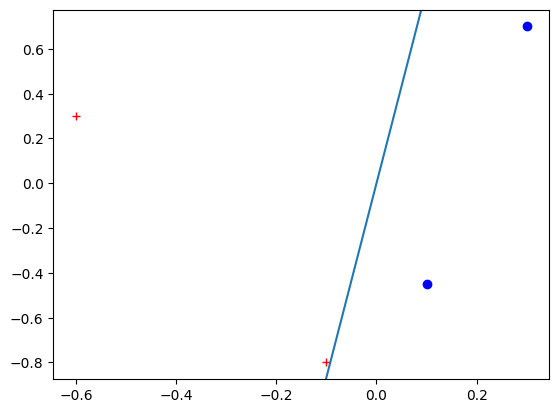

In [48]:
for (x,y,z) in input_data:
  if z == 1:
    plt.plot(x, y, 'bo')
  else:
    plt.plot(x, y, 'r+')


x1 , y1 = 0.01 , -percep.weight_list[0]/percep.weight_list[1] * 0.01
x2 , y2 = -0.01 , -percep.weight_list[0]/percep.weight_list[1] * -0.01
plt.axline((x1, y1), (x2, y2))
plt.show()


**ex7**


In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
drive.mount('/content/drive/')


data = pd.read_csv("/content/drive/My Drive/dataset/2d-2class-dataset_non_linear.csv")
data = shuffle(data)
train_data, test_data = train_test_split(data,test_size=0.3,random_state=0)
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()




act_func = logistic_activation_function()
err_func = delta_rule_error_function(learning_rate= 0.5)

percep = node(act_func, err_func, 1, random_weight= True, bias = True, acceptable_error_range= 0.1)
epoch = 10
for i in range(epoch):
  for (x,y,z) in train_data:
    percep.forward(np.asarray([y]))
    print(x,y,z)
    print(f'out befor back prop: {percep.out} and real is {z}')
    print(f'weight befor back prop: {percep.weight_list}')
    percep.back_prop(z)
    print(f'weight after back prop: {percep.weight_list}')
    print('--------------------')

Streaming output truncated to the last 5000 lines.
8.0 2.0 0.04
out befor back prop: 0.03672999691619072 and real is 0.04
weight befor back prop: [[ 0.63600421 -4.53874839]]
weight after back prop: [[ 0.63600421 -4.53874839]]
--------------------
5.0 4.0 0.16
out befor back prop: 0.11975718559256551 and real is 0.16
weight befor back prop: [[ 0.63600421 -4.53874839]]
weight after back prop: [[ 0.63600421 -4.53874839]]
--------------------
3.0 6.0 0.36
out befor back prop: 0.32679361164757204 and real is 0.36
weight befor back prop: [[ 0.63600421 -4.53874839]]
weight after back prop: [[ 0.63600421 -4.53874839]]
--------------------
4.0 8.0 0.64
out befor back prop: 0.633969754852089 and real is 0.64
weight befor back prop: [[ 0.63600421 -4.53874839]]
weight after back prop: [[ 0.63600421 -4.53874839]]
--------------------
1.0 7.0 0.49
out befor back prop: 0.47833384404334534 and real is 0.49
weight befor back prop: [[ 0.63600421 -4.53874839]]
weight after back prop: [[ 0.63600421 -4.538